<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Raw-data-stats" data-toc-modified-id="Raw-data-stats-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Raw data stats</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read in data</a></span><ul class="toc-item"><li><span><a href="#Produce-latex-table" data-toc-modified-id="Produce-latex-table-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Produce latex table</a></span></li><li><span><a href="#Add-region" data-toc-modified-id="Add-region-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Add region</a></span></li></ul></li><li><span><a href="#Calculate-number-of-empty-tiles" data-toc-modified-id="Calculate-number-of-empty-tiles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate number of empty tiles</a></span><ul class="toc-item"><li><span><a href="#Create-sample-to-check-what's-empty" data-toc-modified-id="Create-sample-to-check-what's-empty-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create sample to check what's empty</a></span></li></ul></li><li><span><a href="#highest-number-of-markings-per-tile" data-toc-modified-id="highest-number-of-markings-per-tile-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>highest number of markings per tile</a></span></li><li><span><a href="#Convert-distance-to-meters" data-toc-modified-id="Convert-distance-to-meters-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Convert distance to meters</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Reduction-of-number-of-fan-markings-to-finals" data-toc-modified-id="Reduction-of-number-of-fan-markings-to-finals-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Reduction of number of fan markings to finals</a></span></li></ul></li></ul></li><li><span><a href="#Length-stats" data-toc-modified-id="Length-stats-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Length stats</a></span><ul class="toc-item"><li><span><a href="#Blotch-sizes" data-toc-modified-id="Blotch-sizes-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Blotch sizes</a></span></li><li><span><a href="#Longest-fans" data-toc-modified-id="Longest-fans-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Longest fans</a></span></li></ul></li><li><span><a href="#North-azimuths" data-toc-modified-id="North-azimuths-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>North azimuths</a></span></li><li><span><a href="#User-stats" data-toc-modified-id="User-stats-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>User stats</a></span></li><li><span><a href="#pipeline-output-examples" data-toc-modified-id="pipeline-output-examples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>pipeline output examples</a></span></li></ul></div>

In [1]:
%matplotlib ipympl

In [2]:
import seaborn as sns
sns.set()
sns.set_context('paper')
sns.set_palette('colorblind')
from planet4 import io, stats, markings, plotting, region_data
from planet4.catalog_production import ReleaseManager

In [8]:
fans = pd.read_csv("/Users/klay6683/Dropbox/data/planet4/p4_analysis/P4_catalog_v1.0/P4_catalog_v1.0_L1C_cut_0.5_fan_meta_merged.csv")
blotch = pd.read_csv("/Users/klay6683/Dropbox/data/planet4/p4_analysis/P4_catalog_v1.0/P4_catalog_v1.0_L1C_cut_0.5_blotch_meta_merged.csv")

In [4]:
pd.set_option("display.max_columns", 150)

In [5]:
fans.head()

,angle,distance,tile_id,image_x,image_y,marking_id,n_votes,obsid,spread,version,vote_ratio,x,x_angle,y,y_angle,l_s,north_azimuth,map_scale,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,PositiveEast360Longitude
0,205.56,179.71,APF0000ci9,2270.76,24336.16,F000000,35,ESP_012079_0945,88.03,1,1.00,790.76,-0.90,224.16,-0.43,214.785,126.856883,1.0,-65.804336,261.407884,-3370.504345,-85.427383,-85.480830,104.129523
1,185.39,179.62,APF0000cia,3391.21,5640.60,F000001,15,ESP_012079_0945,21.35,1,1.00,431.21,-1.00,160.60,-0.09,214.785,126.856883,1.0,-67.219114,257.011589,-3370.631413,-85.493546,-85.546226,104.656897
2,184.98,500.27,APF0000cia,3509.96,5876.70,F000002,10,ESP_012079_0945,18.91,1,1.00,549.96,-1.00,396.70,-0.09,214.785,126.856883,1.0,-67.170611,257.055226,-3370.630794,-85.493039,-85.545725,104.644396
3,184.29,105.43,APF0000cia,3716.27,5824.50,F000004,6,ESP_012079_0945,26.41,1,0.68,756.27,-1.00,344.50,-0.07,214.785,126.856883,1.0,-67.127761,257.024926,-3370.635002,-85.493723,-85.546401,104.637107
4,189.42,109.50,APF0000cia,3452.17,6033.00,F000005,3,ESP_012079_0945,22.58,1,0.51,492.17,-0.99,553.00,-0.16,214.785,126.856883,1.0,-67.169940,257.096267,-3370.628302,-85.492368,-85.545061,104.642019


In [7]:
fans.l_s.head().values[0]

214.785

In [28]:
group_blotch = blotch.groupby("obsid")

In [29]:
type(group_blotch)

pandas.core.groupby.groupby.DataFrameGroupBy

In [30]:
counts = group_blotch.marking_id.count()

In [31]:
counts.head()

obsid
ESP_011296_0975    1026
ESP_011341_0980     283
ESP_011348_0950     197
ESP_011350_0945     628
ESP_011351_0945    1177
Name: marking_id, dtype: int64

In [32]:
counts.plot(c='r')

FigureCanvasNbAgg()

In [34]:
plt.figure()
counts.hist()

FigureCanvasNbAgg()

In [35]:
counts.max()

20917

In [36]:
counts.min()

17

In [38]:
fans.head()

,angle,distance,tile_id,image_x,image_y,marking_id,n_votes,obsid,spread,version,vote_ratio,x,x_angle,y,y_angle,l_s,north_azimuth,map_scale,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,PositiveEast360Longitude
0,205.56,179.71,APF0000ci9,2270.76,24336.16,F000000,35,ESP_012079_0945,88.03,1,1.00,790.76,-0.90,224.16,-0.43,214.785,126.856883,1.0,-65.804336,261.407884,-3370.504345,-85.427383,-85.480830,104.129523
1,185.39,179.62,APF0000cia,3391.21,5640.60,F000001,15,ESP_012079_0945,21.35,1,1.00,431.21,-1.00,160.60,-0.09,214.785,126.856883,1.0,-67.219114,257.011589,-3370.631413,-85.493546,-85.546226,104.656897
2,184.98,500.27,APF0000cia,3509.96,5876.70,F000002,10,ESP_012079_0945,18.91,1,1.00,549.96,-1.00,396.70,-0.09,214.785,126.856883,1.0,-67.170611,257.055226,-3370.630794,-85.493039,-85.545725,104.644396
3,184.29,105.43,APF0000cia,3716.27,5824.50,F000004,6,ESP_012079_0945,26.41,1,0.68,756.27,-1.00,344.50,-0.07,214.785,126.856883,1.0,-67.127761,257.024926,-3370.635002,-85.493723,-85.546401,104.637107
4,189.42,109.50,APF0000cia,3452.17,6033.00,F000005,3,ESP_012079_0945,22.58,1,0.51,492.17,-0.99,553.00,-0.16,214.785,126.856883,1.0,-67.169940,257.096267,-3370.628302,-85.492368,-85.545061,104.642019


In [54]:
plt.figure(constrained_layout=True)
counts[:20].plot.bar()

FigureCanvasNbAgg()

In [52]:
plt.figure()
counts[:10].plot(use_index=True)

FigureCanvasNbAgg()

In [39]:
plt.figure()
counts[:10]

In [25]:
grouped = fans.groupby("obsid")

In [33]:
grouped.tile_id.nunique().sort_values(ascending=False).head()

obsid
ESP_011680_1055    429
ESP_012079_0945    386
ESP_012316_0925    359
ESP_020742_0925    359
ESP_021495_0935    352
Name: tile_id, dtype: int64

In [15]:
%matplotlib inline

In [11]:
from planet4.markings import ImageID

In [13]:
p4id = ImageID('7t9')

In [15]:
p4id.image_name

'ESP_012604_0965'

In [14]:
p4id.plot_fans()

FigureCanvasNbAgg()

In [19]:
filtered = fans[fans.tile_id=='APF0000cia']

In [20]:
filtered.shape

(4, 24)

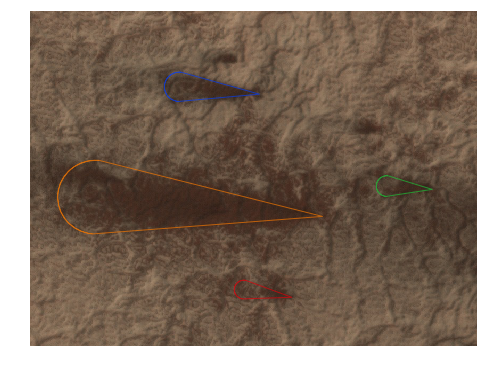

In [21]:
p4id.plot_fans(data=filtered)

# Raw data stats

In [3]:
import dask.dataframe as dd

In [4]:
db = io.DBManager()
db.dbname

'/Users/klay6683/local_data/planet4/2017-12-31_planet_four_classifications_queryable_cleaned_seasons2and3.h5'

In [5]:
df = dd.read_hdf(db.dbname, 'df')

In [6]:
df.columns

Index(['classification_id', 'created_at', 'image_id', 'image_name',
       'image_url', 'user_name', 'marking', 'x_tile', 'y_tile',
       'acquisition_date', 'local_mars_time', 'x', 'y', 'image_x', 'image_y',
       'radius_1', 'radius_2', 'distance', 'angle', 'spread', 'version',
       'x_angle', 'y_angle'],
      dtype='object')

In [7]:
grp = df.groupby(['user_name'])

In [ ]:
s = grp.classification_id.nunique().compute().sort_values(ascending=False).head(5)

In [42]:
s

user_name
Paul Johnson      31808
gwyneth walker    29552
poplar11          21143
14int             19394
Kitharode         16483
Name: classification_id, dtype: int64

# Read in data

In [3]:
rm = ReleaseManager('v1.0')

In [8]:
db = io.DBManager()

In [ ]:
data = db.get_all()

In [5]:
fans = pd.read_csv(rm.fan_merged)

In [6]:
fans.shape

(159287, 24)

In [7]:
fans.columns

Index(['angle', 'distance', 'tile_id', 'image_x', 'image_y', 'marking_id',
       'n_votes', 'obsid', 'spread', 'version', 'vote_ratio', 'x', 'x_angle',
       'y', 'y_angle', 'l_s', 'north_azimuth', 'map_scale',
       'BodyFixedCoordinateX', 'BodyFixedCoordinateY', 'BodyFixedCoordinateZ',
       'PlanetocentricLatitude', 'PlanetographicLatitude',
       'PositiveEast360Longitude'],
      dtype='object')

In [5]:
from planet4.stats import define_season_column

In [6]:
define_season_column(fans)

In [7]:
fans.columns

Index(['angle', 'distance', 'image_id', 'image_name', 'image_x', 'image_y',
       'marking_id', 'n_votes', 'obsid', 'radius_1', 'radius_2', 'spread',
       'version', 'vote_ratio', 'x', 'x_angle', 'x_tile', 'y', 'y_angle',
       'y_tile', 'season'],
      dtype='object')

In [13]:
season2 = fans[fans.season==2]

In [14]:
season2.shape

(101291, 21)

In [11]:
img223 = fans.query("image_name=='ESP_012265_0950'")

In [15]:
img223.shape

(227, 21)

In [14]:
plt.figure()
img223.angle.hist()

FigureCanvasNbAgg()

In [12]:
fans.season.dtype

dtype('int64')

In [15]:
meta = pd.read_csv(rm.metadata_path, dtype='str')

In [19]:
cols_to_merge = ['OBSERVATION_ID',
                         'SOLAR_LONGITUDE', 'north_azimuth', 'map_scale']

In [20]:
fans = fans.merge(meta[cols_to_merge], left_on='obsid', right_on='OBSERVATION_ID')

In [23]:
fans.drop(rm.DROP_FOR_FANS, axis=1, inplace=True)

In [34]:
fans.image_x.head()

0    2270.76
1    3391.21
2    3509.96
3    3716.27
4    3452.17
Name: image_x, dtype: float64

In [35]:
ground['image_x'] = pd.to_numeric(ground.image_x)

In [36]:
ground['image_y'] = pd.to_numeric(ground.image_y)

In [37]:
fans_new = fans.merge(ground[rm.COLS_TO_MERGE], on=['obsid', 'image_x', 'image_y'])

In [38]:
fans_new.shape

(159287, 24)

In [39]:
fans.shape

(159287, 18)

In [42]:
s = pd.to_numeric(ground.BodyFixedCoordinateX)

In [43]:
s.head()

0   -65.804336
1   -67.219114
2   -67.170611
3   -67.127761
4   -67.169940
Name: BodyFixedCoordinateX, dtype: float64

In [44]:
s.round(decimals=4)

0         -65.8043
1         -67.2191
2         -67.1706
3         -67.1278
4         -67.1699
5         -66.2586
6         -66.4002
7         -66.2964
8         -66.2613
9         -66.3002
10        -66.1356
11        -67.6400
12        -67.6993
13        -63.7707
14        -63.7277
15        -64.9088
16        -64.9321
17        -67.0510
18        -67.0589
19        -67.1364
20        -67.0644
21        -67.1564
22        -66.1304
23        -63.9310
24        -63.8152
25        -63.7585
26        -67.4182
27        -67.2839
28        -67.3953
29        -66.3074
            ...   
408244    219.7665
408245    219.9222
408246    219.9011
408247    219.9375
408248    219.9216
408249    219.8750
408250    219.9589
408251    219.9664
408252    219.9880
408253    220.0149
408254    220.1224
408255    220.1253
408256    220.1912
408257    220.2434
408258    220.2768
408259    220.0018
408260    219.8550
408261    219.7772
408262    220.2271
408263    220.2366
408264    219.8505
408265    22

In [44]:
blotches = rm.read_blotch_file().assign(marking='blotch')
fans = rm.read_fan_file().assign(marking='fan')
combined = pd.concat([blotches, fans], ignore_index=True)
blotches.head()

,angle,tile_id,image_x,image_y,marking_id,n_votes,obsid,radius_1,radius_2,vote_ratio,...,l_s,north_azimuth,map_scale,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,PositiveEast360Longitude,marking
0,2.28,APF0000cia,3330.27,5573.00,B000000,4,ESP_012079_0945,22.13,15.78,1.00,...,214.785,126.856883,0.25,-67.239204,257.001479,-3370.630963,-85.493625,-85.546304,104.661641,blotch
1,1.38,APF0000cia,3593.60,5706.40,B000001,5,ESP_012079_0945,25.55,15.73,0.55,...,214.785,126.856883,0.25,-67.166591,257.008699,-3370.633997,-85.493821,-85.546498,104.646095,blotch
2,7.16,APF0000cic,98.10,34394.70,B000004,10,ESP_012079_0945,84.54,48.33,1.00,...,214.785,126.856883,0.25,-65.402430,263.908435,-3370.353988,-85.387847,-85.441752,103.918757,blotch
3,81.00,APF0000cic,825.58,34203.38,B000005,8,ESP_012079_0945,51.92,35.12,1.00,...,214.785,126.856883,0.25,-65.252200,263.799557,-3370.366324,-85.390258,-85.444136,103.893534,blotch
4,14.66,APF0000cic,152.67,34155.33,B000006,3,ESP_012079_0945,184.94,71.25,1.00,...,214.785,126.856883,0.25,-65.411364,263.848868,-3370.358955,-85.388794,-85.442688,103.923605,blotch


## Produce latex table

In [36]:
fans.columns

Index(['angle', 'distance', 'tile_id', 'image_x', 'image_y', 'marking_id',
       'n_votes', 'obsid', 'spread', 'version', 'vote_ratio', 'x', 'x_angle',
       'y', 'y_angle', 'l_s', 'north_azimuth', 'map_scale',
       'BodyFixedCoordinateX', 'BodyFixedCoordinateY', 'BodyFixedCoordinateZ',
       'PlanetocentricLatitude', 'PlanetographicLatitude',
       'PositiveEast360Longitude', 'marking'],
      dtype='object')

In [37]:
cols1 = fans.columns[:13]
print(cols1)
cols2 = fans.columns[13:-4]
print(cols2)
cols3 = fans.columns[-4:-1]
cols3

Index(['angle', 'distance', 'tile_id', 'image_x', 'image_y', 'marking_id',
       'n_votes', 'obsid', 'spread', 'version', 'vote_ratio', 'x', 'x_angle'],
      dtype='object')
Index(['y', 'y_angle', 'l_s', 'north_azimuth', 'map_scale',
       'BodyFixedCoordinateX', 'BodyFixedCoordinateY', 'BodyFixedCoordinateZ'],
      dtype='object')


Index(['PlanetocentricLatitude', 'PlanetographicLatitude',
       'PositiveEast360Longitude'],
      dtype='object')

In [38]:
fanshead1 = fans[cols1].head(10)
fanshead2 = fans[cols2].head(10)
fanshead3 = fans[cols3].head(10)

In [39]:
with open("fan_table1.tex", 'w') as f:
    f.write(fanshead1.to_latex())

1897

In [40]:
with open("fan_table2.tex", 'w') as f:
    f.write(fanshead2.to_latex())

1605

In [41]:
with open("fan_table3.tex", 'w') as f:
    f.write(fanshead3.to_latex())

1002

## Add region
Adding a region identifier, immensely helpful in automatically plotting stuff across regions.

In [5]:
for Reg in region_data.regions:
    reg = Reg()
    print(reg.name)
    combined.loc[combined.obsid.isin(reg.all_obsids), 'region'] = reg.name
    fans.loc[fans.obsid.isin(reg.all_obsids), 'region']= reg.name
    blotches.loc[blotches.obsid.isin(reg.all_obsids), 'region'] = reg.name

Giza
Inca
Ithaca
Manhattan
Manhattan2
Bilbao
Oswego_Edge
Manhattan_Frontinella
BuenosAires
Maccelsfield
Starburst
Potsdam
Portsmouth


# Calculate number of empty tiles 

In [8]:
tiles_marked = combined.tile_id.unique()

In [9]:
db = io.DBManager()

In [10]:
input_tiles = db.image_ids
input_tiles.shape[0]

42904

In [11]:
n_empty = input_tiles.shape[0] - tiles_marked.shape[0]
n_empty

12693

In [12]:
n_empty / input_tiles.shape[0]

0.29584654111504755

In [13]:
empty_tiles = list(set(input_tiles) - set(tiles_marked))

In [14]:
all_data = db.get_all()

In [15]:
all_data.set_index('image_id', inplace=True)

In [16]:
empty_data = all_data.loc[empty_tiles]

In [28]:
meta = pd.read_csv(rm.metadata_path)
meta.head()

,OBSERVATION_ID,IMAGE_CENTER_LATITUDE,IMAGE_CENTER_LONGITUDE,SOLAR_LONGITUDE,START_TIME,map_scale,north_azimuth,# of tiles
0,ESP_011296_0975,-82.1965,225.2530,178.833,2008-12-23 16:15:26,1.0,110.600107,91
1,ESP_011341_0980,-81.7969,76.1304,180.809,2008-12-27 04:25:02,0.5,110.208923,126
2,ESP_011348_0950,-85.0427,259.0940,181.117,2008-12-27 17:29:17,1.0,123.624057,91
3,ESP_011350_0945,-85.2160,181.4150,181.205,2008-12-27 21:14:01,0.5,99.672793,126
4,ESP_011351_0945,-85.2157,181.5480,181.249,2008-12-27 23:05:54,1.0,127.960688,91


In [29]:
empty_tile_numbers = empty_data.reset_index().groupby('image_name')[['x_tile', 'y_tile']].max()

In [30]:
empty_tile_numbers['total'] = empty_tile_numbers.x_tile*empty_tile_numbers.y_tile

In [31]:
empty_tile_numbers.head()

,x_tile,y_tile,total
image_name,,,
ESP_011341_0980,2,63,126
ESP_011348_0950,1,91,91
ESP_011350_0945,2,23,46
ESP_011351_0945,1,91,91
ESP_011370_0980,2,63,126


In [32]:
n_empty_per_obsid = empty_data.reset_index().groupby('image_name').image_id.nunique()

In [33]:
n_empty_per_obsid = n_empty_per_obsid.to_frame()

In [34]:
n_empty_per_obsid.columns = ['n']

In [35]:
df = n_empty_per_obsid

In [36]:
df = df.join(empty_tile_numbers.total)

In [37]:
df = df.assign(ratio=df.n/df.total)

In [38]:
df = df.join(meta.set_index('OBSERVATION_ID'))

In [39]:
df['scaled_n'] = df.n / df.map_scale / df.map_scale

In [40]:
import seaborn as sns
sns.set_context('notebook')

In [41]:
df.plot(kind='scatter', y='ratio', x='SOLAR_LONGITUDE')
ax = plt.gca()
ax.set_ylabel('Fraction of empty tiles per HiRISE image')
ax.set_xlabel('Solar Longitude [$^\circ$]')
ax.set_title("Distribution of empty tiles vs time")
plt.savefig("/Users/klay6683/Dropbox/src/p4_paper1/figures/empty_data_vs_ls.pdf")

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

In [43]:
df[df.ratio > 0.8]

,n,total,ratio,IMAGE_CENTER_LATITUDE,IMAGE_CENTER_LONGITUDE,SOLAR_LONGITUDE,START_TIME,map_scale,north_azimuth,# of tiles,scaled_n
image_name,,,,,,,,,,,
ESP_011422_0930,28,33,0.848485,-87.0408,72.3564,184.393,2009-01-02 11:51:51,1.00,156.971839,54,28.0
ESP_012053_0980,399,455,0.876923,-81.8074,76.1621,213.543,2009-02-20 15:56:08,0.25,108.975943,455,6384.0
ESP_012251_0935,289,360,0.802778,-86.3968,99.1505,223.070,2009-03-08 02:10:48,0.25,137.978021,360,4624.0
ESP_012264_0980,430,455,0.945055,-81.8105,76.1688,223.702,2009-03-09 02:30:59,0.25,109.478178,455,6880.0
ESP_012277_0975,119,144,0.826389,-82.5184,80.0468,224.333,2009-03-10 02:49:25,0.50,107.561361,144,476.0
ESP_012990_0930,299,360,0.830556,-87.0001,98.8753,259.432,2009-05-04 16:10:56,0.25,153.852488,360,4784.0
ESP_013095_0935,87,108,0.805556,-86.3918,99.0704,264.609,2009-05-12 20:32:13,0.50,138.858612,108,348.0
ESP_020558_0930,126,144,0.875000,-87.0036,127.4130,198.899,2010-12-15 09:02:54,0.50,155.833953,144,504.0
ESP_020731_0930,228,270,0.844444,-87.0030,86.5484,206.975,2010-12-28 20:34:41,0.25,159.909177,270,3648.0


## Create sample to check what's empty

In [14]:
sample = np.random.choice(empty_tiles, 200)

In [15]:
cd plots

/Users/klay6683/Dropbox/src/planet4/notebooks/plots


In [16]:
from tqdm import tqdm

In [17]:
for image_id in tqdm(sample):
    fig, ax = plt.subplots(ncols=2)
    plotting.plot_raw_fans(image_id, ax=ax[0])
    plotting.plot_raw_blotches(image_id, ax=ax[1])
    fig.savefig(f"empty_tiles/{image_id}_input_markings.png", dpi=150)
    plt.close('all')

100%|██████████| 200/200 [03:45<00:00,  1.13s/it]


# highest number of markings per tile

In [6]:
fans_per_tile = fans.groupby('tile_id').size().sort_values(ascending=False)
fans_per_tile.head()

tile_id
APF00006mr    167
APF0000ay0    159
APF0000q3x    135
APF0000at2    128
APF0000hyn    127
dtype: int64

In [7]:
blotches_per_tile = blotches.groupby('tile_id').size().sort_values(ascending=False)
blotches_per_tile.head()

tile_id
APF00007t9    278
APF00007gm    244
APF00007ob    239
APF00007r9    221
APF00007nm    221
dtype: int64

In [8]:
print(fans_per_tile.median())
blotches_per_tile.median()

4.0


4.0

In [9]:
plt.close('all')

In [10]:
by_image_id = combined.groupby(['marking', 'tile_id']).size()

In [11]:
by_image_id.name = 'Markings per tile'

In [12]:
by_image_id = by_image_id.reset_index()

In [13]:
by_image_id.columns

Index(['marking', 'tile_id', 'Markings per tile'], dtype='object')

In [15]:
g = sns.FacetGrid(by_image_id, col="marking", aspect=1.2)
bins = np.arange(0, 280, 5)
g.map(sns.distplot, 'Markings per tile', kde=False, bins=bins, hist_kws={'log':True})
plt.savefig('/Users/klay6683/Dropbox/src/p4_paper1/figures/number_distributions.pdf', dpi=150)

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [16]:
blotches_per_tile.median()

4.0

In [17]:
from planet4 import plotting

In [18]:
# %load -n plotting.plot_finals_with_input
def plot_finals_with_input(id_, datapath=None, horizontal=True, scope='planet4'):
    imgid = markings.ImageID(id_, scope=scope)
    pm = io.PathManager(id_=id_, datapath=datapath)
    if horizontal is True:
        kwargs = {'ncols': 2}
    else:
        kwargs = {'nrows': 2}
    fig, ax = plt.subplots(figsize=(4,5), **kwargs)
    ax[0].set_title(imgid.imgid, fontsize=8)
    imgid.show_subframe(ax=ax[0])
    for marking in ['fan', 'blotch']:
        try:
            df = getattr(pm, f"final_{marking}df")
        except:
            continue
        else:
            data = df[df.image_id == imgid.imgid]
            imgid.plot_markings(marking, data, ax=ax[1])
    fig.subplots_adjust(top=0.95,bottom=0, left=0, right=1, hspace=0.01, wspace=0.01)
    fig.savefig(f"/Users/klay6683/Dropbox/src/p4_paper1/figures/{imgid.imgid}_final.png",
                dpi=150)

In [19]:
plot_finals_with_input('7t9', rm.savefolder, horizontal=False)

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

In [20]:
markings.ImageID('7t9').image_name

'ESP_012604_0965'

# Convert distance to meters

In [21]:
fans['distance_m'] = fans.distance*fans.map_scale

blotches['radius_1_m'] = blotches.radius_1*blotches.map_scale
blotches['radius_2_m'] = blotches.radius_2*blotches.map_scale

### Reduction of number of fan markings to finals

In [22]:
n_fan_in = 2792963

In [23]:
fans.shape[0]

159287

In [24]:
fans.shape[0] / n_fan_in

0.05703154678382778

# Length stats

Percentage of fan markings below 100 m:

In [25]:
import scipy
scipy.stats.percentileofscore(fans.distance_m, 100)

96.5967090848594

Cumulative histogram of fan lengths

In [26]:
def add_percentage_line(ax, meters, column):
    y = scipy.stats.percentileofscore(column, meters)
    ax.axhline(y/100, linestyle='dashed', color='black', lw=1)
    ax.axvline(meters, linestyle='dashed', color='black', lw=1)
    ax.text(meters, y/100, f"{y/100:0.2f}")

In [27]:
plt.close('all')

In [28]:
fans.distance_m.max()

372.82

In [29]:
bins = np.arange(0,380, 5)

In [30]:
fig, ax = plt.subplots(figsize=(8,3), ncols=2, sharey=False)
sns.distplot(fans.distance_m, bins=bins, kde=False, 
             hist_kws={'cumulative':False,'normed':True, 'log':True},
             axlabel='Fan length [m]', ax=ax[0])
sns.distplot(fans.distance_m, bins=bins, kde=False, hist_kws={'cumulative':True,'normed':True},
            axlabel='Fan length [m]', ax=ax[1])
ax[0].set_title("Normalized Log-Histogram of fan lengths ")
ax[1].set_title("Cumulative normalized histogram of fan lengths")
ax[1].set_ylabel("Fraction of fans with given length")
add_percentage_line(ax[1], 100, fans.distance_m)
add_percentage_line(ax[1], 50, fans.distance_m)
fig.tight_layout()
fig.savefig("/Users/klay6683/Dropbox/src/p4_paper1/figures/fan_lengths_histos.pdf",
            dpi=150, bbox_inches='tight')

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [31]:
fans.query('distance_m>350')[['distance_m', 'obsid', 'l_s']]

,distance_m,obsid,l_s
113542,351.360,ESP_020146_0950,180.311
123489,360.920,ESP_011961_0935,209.169
123544,367.915,ESP_011961_0935,209.169
156639,372.820,ESP_013095_0935,264.609


In [34]:
fans.distance_m.describe()

count    159287.000000
mean         33.111212
std          28.040717
min           2.500000
25%          14.497500
50%          24.090000
75%          41.885000
max         372.820000
Name: distance_m, dtype: float64

In words, the mean length of fans is {{f"{fans.distance_m.describe()['mean']:.1f}"}} m, while the median is
{{f"{fans.distance_m.describe()['50%']:.1f}"}} m.

In [35]:
fans.replace("Manhattan_Frontinella", "Manhattan_\nFrontinella", inplace=True)

In [37]:
fig, ax = plt.subplots()
sns.boxplot(y="region", x="distance_m", data=fans, ax=ax,
            fliersize=3)
ax.set_title("Fan lengths in different ROIs")
fig.tight_layout()
fig.savefig("/Users/klay6683/Dropbox/src/p4_paper1/figures/fan_lengths_vs_regions.pdf",
         dpi=150, bbox_inches='tight')

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

## Blotch sizes

In [38]:
plt.figure()
cols = ['radius_1','radius_2']
sns.distplot(blotches[cols], kde=False, bins=np.arange(2.0,50.), 
             color=['r','g'], label=cols)
plt.legend()

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [39]:
plt.figure()
cols = ['radius_1_m','radius_2_m']
sns.distplot(blotches[cols], kde=False, bins=np.arange(2.0,50.), 
             color=['r','g'], label=cols)
plt.legend()

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [40]:
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(blotches.radius_2_m, bins=500, kde=False, hist_kws={'cumulative':True,'normed':True},
            axlabel='Blotch radius_1 [m]', ax=ax)
ax.set_title("Cumulative normalized histogram for blotch lengths")
ax.set_ylabel("Fraction of blotches with given radius_1")
add_percentage_line(ax, 30, blotches.radius_2_m)
add_percentage_line(ax, 10, blotches.radius_2_m)

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [41]:
import scipy
scipy.stats.percentileofscore(blotches.radius_2_m, 30)

97.42885103153523

In [42]:
plt.close('all')

## Longest fans

In [43]:
fans.query('distance_m > 350')[
    'distance_m distance obsid image_x image_y tile_id'.split()].sort_values(
        by='distance_m')

,distance_m,distance,obsid,image_x,image_y,tile_id
113542,351.360,351.36,ESP_020146_0950,791.24,12659.67,APF0000q45
123489,360.920,721.84,ESP_011961_0935,782.78,9321.29,APF0000ddo
123544,367.915,735.83,ESP_011961_0935,868.67,5188.52,APF0000de3
156639,372.820,745.64,ESP_013095_0935,1017.12,6038.92,APF0000dtk


In [44]:
from planet4 import plotting

In [45]:
plotting.plot_finals('de3', datapath=rm.catalog)
plt.gca().set_title('APF0000de3')

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

Text(0.5,1,'APF0000de3')

In [46]:
plotting.plot_image_id_pipeline('de3', datapath=rm.catalog, via_obsid=False, figsize=(12,8))

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

In [22]:
from planet4 import region_data

In [23]:
from planet4 import stats

In [24]:
stats.define_season_column(fans)
stats.define_season_column(blotches)

In [25]:
fans.season.value_counts()

2    101286
3     58002
Name: season, dtype: int64

In [26]:
fans.query('season==2').distance_m.median()

24.222173790536814

In [27]:
fans.query('season==3').distance_m.median()

23.816898558177456

In [28]:
from planet4 import region_data

In [29]:
for region in ['Manhattan2', 'Giza','Ithaca']:
    print(region)
    obj = getattr(region_data, region)
    for s in ['season2','season3']:
        print(s)
        obsids = getattr(obj, s)
        print(fans[fans.obsid.isin(obsids)].distance_m.median())

Manhattan2
season2
42.87423178465934
season3
24.89731703758306
Giza
season2
44.08823250757917
season3
59.00166238702526
Ithaca
season2
39.51412135421972
season3
38.66049187479137


In [30]:
db = io.DBManager()

In [31]:
all_data = db.get_all()

In [32]:
image_names = db.image_names

In [33]:
g_all = all_data.groupby('image_id')

In [34]:
g_all.size().sort_values().head()

image_id
APF0000dss    26
APF0000qsi    26
APF0000qym    27
APF0000lj6    27
APF0000rvj    28
dtype: int64

In [37]:
fans.columns

Index(['angle', 'distance', 'image_id', 'image_name', 'image_x', 'image_y',
       'n_votes', 'obsid', 'radius_1', 'radius_2', 'spread', 'version',
       'vote_ratio', 'x', 'x_angle', 'x_tile', 'y', 'y_angle', 'y_tile',
       'binning', 'l_s', 'line_samples', 'lines', 'map_scale', 'north_azimuth',
       'path', 'BodyFixedCoordinateX', 'BodyFixedCoordinateY',
       'BodyFixedCoordinateZ', 'Line', 'LineResolution',
       'PlanetocentricLatitude', 'PlanetographicLatitude',
       'PositiveEast360Longitude', 'PositiveWest360Longitude', 'Sample',
       'SampleResolution', 'distance_m', 'season'],
      dtype='object')

In [44]:
cols_to_drop = ['path', 'image_name', 'binning', 'LineResolution', 'SampleResolution', 'Line', 'Sample']

In [46]:
fans.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

In [47]:
fans.columns

Index(['angle', 'distance', 'image_id', 'image_x', 'image_y', 'n_votes',
       'obsid', 'radius_1', 'radius_2', 'spread', 'version', 'vote_ratio', 'x',
       'x_angle', 'x_tile', 'y', 'y_angle', 'y_tile', 'l_s', 'line_samples',
       'lines', 'map_scale', 'north_azimuth', 'BodyFixedCoordinateX',
       'BodyFixedCoordinateY', 'BodyFixedCoordinateZ',
       'PlanetocentricLatitude', 'PlanetographicLatitude',
       'PositiveEast360Longitude', 'PositiveWest360Longitude', 'distance_m',
       'season'],
      dtype='object')

In [49]:
fans.iloc[1]

angle                               185.387
distance                            179.618
image_id                         APF0000cia
image_x                             3391.21
image_y                              5640.6
n_votes                                  15
obsid                       ESP_012079_0945
radius_1                                NaN
radius_2                                NaN
spread                               21.346
version                                   1
vote_ratio                              NaN
x                                   431.206
x_angle                           -0.995088
x_tile                                    5
y                                     160.6
y_angle                          -0.0938355
y_tile                                   11
l_s                                 214.785
line_samples                          56572
lines                                 25243
map_scale                              0.25
north_azimuth                   

# North azimuths

In [1]:
s = """ESP\_011296\_0975 & -82.197 & 225.253 & 178.8 & 2008-12-23  & 17:08 & 91 \\
ESP\_011341\_0980 & -81.797 & 76.13 & 180.8 & 2008-12-27  & 17:06 & 126 \\
ESP\_011348\_0950 & -85.043 & 259.094 & 181.1 & 2008-12-27  & 18:01 & 91 \\
ESP\_011350\_0945 & -85.216 & 181.415 & 181.2 & 2008-12-27  & 16:29 & 126 \\
ESP\_011351\_0945 & -85.216 & 181.548 & 181.2 & 2008-12-27  & 18:18 & 91 \\
ESP\_011370\_0980 & -81.925 & 4.813 & 182.1 & 2008-12-29  & 17:08 & 126 \\
ESP\_011394\_0935 & -86.392 & 99.068 & 183.1 & 2008-12-31  & 19:04 & 72 \\
ESP\_011403\_0945 & -85.239 & 181.038 & 183.5 & 2009-01-01  & 16:56 & 164 \\
ESP\_011404\_0945 & -85.236 & 181.105 & 183.6 & 2009-01-01  & 18:45 & 91 \\
ESP\_011406\_0945 & -85.409 & 103.924 & 183.7 & 2009-01-01  & 17:15 & 126 \\
ESP\_011407\_0945 & -85.407 & 103.983 & 183.7 & 2009-01-01  & 19:04 & 91 \\
ESP\_011408\_0930 & -87.019 & 86.559 & 183.8 & 2009-01-01  & 19:43 & 59 \\
ESP\_011413\_0970 & -82.699 & 273.129 & 184.0 & 2009-01-01  & 17:17 & 108 \\
ESP\_011420\_0930 & -87.009 & 127.317 & 184.3 & 2009-01-02  & 20:16 & 54 \\
ESP\_011422\_0930 & -87.041 & 72.356 & 184.4 & 2009-01-02  & 20:15 & 54 \\
ESP\_011431\_0930 & -86.842 & 178.244 & 184.8 & 2009-01-03  & 19:41 & 54 \\
ESP\_011447\_0950 & -84.805 & 65.713 & 185.5 & 2009-01-04  & 17:19 & 218 \\
ESP\_011448\_0950 & -84.806 & 65.772 & 185.6 & 2009-01-04  & 19:09 & 59 \\"""

In [16]:
lines = s.split(' \\')

In [22]:
s.replace('\\', '')

'ESP_011296_0975 & -82.197 & 225.253 & 178.8 & 2008-12-23  & 17:08 & 91 ESP_011341_0980 & -81.797 & 76.13 & 180.8 & 2008-12-27  & 17:06 & 126 ESP_011348_0950 & -85.043 & 259.094 & 181.1 & 2008-12-27  & 18:01 & 91 ESP_011350_0945 & -85.216 & 181.415 & 181.2 & 2008-12-27  & 16:29 & 126 ESP_011351_0945 & -85.216 & 181.548 & 181.2 & 2008-12-27  & 18:18 & 91 ESP_011370_0980 & -81.925 & 4.813 & 182.1 & 2008-12-29  & 17:08 & 126 ESP_011394_0935 & -86.392 & 99.068 & 183.1 & 2008-12-31  & 19:04 & 72 ESP_011403_0945 & -85.239 & 181.038 & 183.5 & 2009-01-01  & 16:56 & 164 ESP_011404_0945 & -85.236 & 181.105 & 183.6 & 2009-01-01  & 18:45 & 91 ESP_011406_0945 & -85.409 & 103.924 & 183.7 & 2009-01-01  & 17:15 & 126 ESP_011407_0945 & -85.407 & 103.983 & 183.7 & 2009-01-01  & 19:04 & 91 ESP_011408_0930 & -87.019 & 86.559 & 183.8 & 2009-01-01  & 19:43 & 59 ESP_011413_0970 & -82.699 & 273.129 & 184.0 & 2009-01-01  & 17:17 & 108 ESP_011420_0930 & -87.009 & 127.317 & 184.3 & 2009-01-02  & 20:16 & 54 ESP_0

In [25]:
obsids = [line.split('&')[0].strip().replace('\\','') for line in lines][:-1]

In [37]:
meta = pd.read_csv(rm.metadata_path)

In [43]:
meta.query('obsid in @obsids').sort_values(by='obsid').

,l_s,line_samples,lines,map_scale,north_azimuth,obsid
51,178.833427,21764,45638,1.0,110.600107,ESP_011296_0975
11,180.808945,29922,20995,0.5,110.208923,ESP_011341_0980
151,181.116852,36210,35440,1.0,123.624057,ESP_011348_0950
18,181.205092,8168,37649,0.5,99.672793,ESP_011350_0945
97,181.249083,30049,40496,1.0,127.960688,ESP_011351_0945
169,182.088249,11358,34231,0.5,110.580189,ESP_011370_0980
189,183.149964,30747,25949,1.0,139.359081,ESP_011394_0935
115,183.549487,14771,45258,0.5,106.472204,ESP_011403_0945
98,183.593752,34927,37137,1.0,134.130277,ESP_011404_0945
175,183.682631,35672,7062,0.5,111.346267,ESP_011406_0945


In [36]:
blotches.groupby('obsid').north_azimuth.nunique()

1

# User stats

In [11]:
db = io.DBManager()

In [13]:
db.dbname = '/Users/klay6683/local_data/planet4/2018-02-11_planet_four_classifications_queryable_cleaned_seasons2and3.h5'

In [15]:
with pd.HDFStore(str(db.dbname)) as store:
    user_names = store.select_column('df', 'user_name').unique()

In [16]:
user_names.shape

(84527,)

In [18]:
user_names[:10]

array(['not-logged-in-948f558b3ccd9c7119d6f0fbff89307a',
       'not-logged-in-dc94dbc1ec0d0cb5f1cfe92e193f23a5', 'Star_Gazing',
       'not-logged-in-2d1c3e959436d57ee021b20836e7583d', 'number1',
       'not-logged-in-41d62206b3d3065dd3a0a5bde9918633', 'Paul57',
       'RayUK99', 'universearts', 'cerby'], dtype=object)

In [22]:
not_logged = [i for i in user_names if i.startswith('not-logged-in')]

In [23]:
logged = list(set(user_names) - set(not_logged))

In [25]:
len(logged)

36433

In [26]:
len(not_logged)

48094

In [27]:
not_logged[:20]

['not-logged-in-948f558b3ccd9c7119d6f0fbff89307a',
 'not-logged-in-dc94dbc1ec0d0cb5f1cfe92e193f23a5',
 'not-logged-in-2d1c3e959436d57ee021b20836e7583d',
 'not-logged-in-41d62206b3d3065dd3a0a5bde9918633',
 'not-logged-in-73e4287690c7367f34c91fd4cac32092',
 'not-logged-in-9b65822a4d0ff93585607fc90e06582d',
 'not-logged-in-5a78374f69407be311195ead72062389',
 'not-logged-in-30a0a9efa9dcd6bbb66c120cbadd22df',
 'not-logged-in-3a2cc4e0b7dd04a3e86eb5846b62d2fb',
 'not-logged-in-b47d74c53b4dcbbb1b4bbec461f18303',
 'not-logged-in-6b290c26661f8069bc2b48358fc61985',
 'not-logged-in-525180b587f7a8cda7d4cb104a2e8d0e',
 'not-logged-in-ebf695a0e7b5bd74014579934cd3e132',
 'not-logged-in-ec3f060d58c0c9f5e0699cb055eaa1ac',
 'not-logged-in-b2603bfa5cbcb81c062a80ae86300271',
 'not-logged-in-e58782b56b8ce4de2f3b271fc9333c6c',
 'not-logged-in-0f98acea7cc1f9733225893b336a47f1',
 'not-logged-in-3cfcb1343a2f59ff65f3922f3f3760dc',
 'not-logged-in-02c9524d260ac4237ddbfd1b5f33d99e',
 'not-logged-in-b83c4399dfd5ff2

In [36]:
df = db.get_all()

In [37]:
df[df.marking=='fan'].shape

(2694415, 23)

In [38]:
df[df.marking=='blotch'].shape

(3460056, 23)

In [39]:
df[df.marking=='interesting'].shape

(805903, 23)

In [41]:
n_class_by_user = df.groupby('user_name').classification_id.nunique()

In [42]:
n_class_by_user.describe()

count    84527.000000
mean        41.355969
std        261.514780
min          1.000000
25%          2.000000
50%          7.000000
75%         25.000000
max      31808.000000
Name: classification_id, dtype: float64

In [46]:
logged_users = df.user_name[~df.user_name.str.startswith("not-logged-in")].unique()

In [47]:
logged_users.shape

(36433,)

In [51]:
not_logged = list(set(df.user_name.unique()) - set(logged_users))

In [52]:
len(not_logged)

48094

In [55]:
n_class_by_user[not_logged].describe()

count    48094.000000
mean        20.617104
std         71.088764
min          1.000000
25%          1.000000
50%          4.000000
75%         14.000000
max       2585.000000
Name: classification_id, dtype: float64

In [56]:
n_class_by_user[logged_users].describe()

count    36433.000000
mean        68.732660
std        388.179572
min          1.000000
25%          4.000000
50%         14.000000
75%         45.000000
max      31808.000000
Name: classification_id, dtype: float64

In [61]:
n_class_by_user[n_class_by_user>50].shape[0]/n_class_by_user.shape[0]

0.14768062275959162

In [60]:
n_class_by_user.shape

(84527,)

# pipeline output examples

In [6]:
pm = io.PathManager('any', datapath=rm.savefolder)

In [7]:
cols1 = pm.fandf.columns[:8]
cols2 = pm.fandf.columns[8:-2]
cols3 = pm.fandf.columns[-2:]

In [8]:
print(pm.fandf[cols1].to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  x\_tile &  y\_tile &           x &           y &      image\_x &       image\_y &  radius\_1 &  radius\_2 \\
\midrule
0  &     2.0 &    26.0 &  123.611111 &  455.666667 &   863.611111 &  14155.666667 &       NaN &       NaN \\
1  &     2.0 &    26.0 &  157.000000 &  391.800000 &   897.000000 &  14091.800000 &       NaN &       NaN \\
2  &     2.0 &    26.0 &   92.000000 &  606.400000 &   832.000000 &  14306.400000 &       NaN &       NaN \\
3  &     2.0 &    26.0 &  290.400000 &  277.800000 &  1030.400000 &  13977.800000 &       NaN &       NaN \\
4  &     2.0 &    26.0 &  289.375000 &  275.000000 &  1029.375000 &  13975.000000 &       NaN &       NaN \\
5  &     2.0 &    26.0 &  360.500000 &  308.857143 &  1100.500000 &  14008.857143 &       NaN &       NaN \\
6  &     2.0 &    26.0 &  355.916667 &  308.666667 &  1095.916667 &  14008.666667 &       NaN &       NaN \\
7  &     2.0 &    26.0 &  363.937500 &  305.625000 &  1103.937500 &  14005.62

In [9]:
print(pm.fandf[cols2].to_latex())

\begin{tabular}{lrrrrrrrl}
\toprule
{} &    distance &       angle &      spread &  version &   x\_angle &   y\_angle &  n\_votes &    image\_id \\
\midrule
0  &   81.884266 &  223.712817 &   71.559689 &      1.0 & -0.691035 & -0.660663 &        9 &  APF0000any \\
1  &   57.742472 &  248.754137 &   52.521798 &      1.0 & -0.360802 & -0.927999 &       10 &  APF0000any \\
2  &   58.742330 &  247.146845 &   81.171448 &      1.0 & -0.387419 & -0.919245 &        5 &  APF0000any \\
3  &   74.302023 &  237.056928 &   63.553237 &      1.0 & -0.529280 & -0.816796 &        5 &  APF0000any \\
4  &   63.726058 &  182.515853 &   61.786022 &      1.0 & -0.988914 & -0.043451 &        4 &  APF0000any \\
5  &  125.735426 &  249.370874 &   29.268556 &      1.0 & -0.352186 & -0.935531 &        7 &  APF0000any \\
6  &   98.829259 &  175.600980 &   46.059460 &      1.0 & -0.992413 &  0.076345 &        6 &  APF0000any \\
7  &  141.698658 &  207.461764 &  109.351533 &      1.0 & -0.885223 & -0.460067 &      

In [10]:
print(pm.fandf[cols3].to_latex())

\begin{tabular}{lll}
\toprule
{} &       image\_name & marking\_id \\
\midrule
0  &  ESP\_011350\_0945 &    F006de3 \\
1  &  ESP\_011350\_0945 &    F006de4 \\
2  &  ESP\_011350\_0945 &    F006de5 \\
3  &  ESP\_011350\_0945 &    F006de6 \\
4  &  ESP\_011350\_0945 &    F006de7 \\
5  &  ESP\_011350\_0945 &    F006de8 \\
6  &  ESP\_011350\_0945 &    F006de9 \\
7  &  ESP\_011350\_0945 &    F006dea \\
8  &  ESP\_011350\_0945 &    F006deb \\
9  &  ESP\_011350\_0945 &    F006dec \\
10 &  ESP\_011350\_0945 &    F006ded \\
11 &  ESP\_011350\_0945 &    F006dee \\
12 &  ESP\_011350\_0945 &    F006def \\
13 &  ESP\_011350\_0945 &    F006df0 \\
14 &  ESP\_011350\_0945 &    F006df1 \\
15 &  ESP\_011350\_0945 &    F006df2 \\
16 &  ESP\_011350\_0945 &    F006df3 \\
17 &  ESP\_011350\_0945 &    F006df4 \\
18 &  ESP\_011350\_0945 &    F006df5 \\
19 &  ESP\_011350\_0945 &    F006df6 \\
20 &  ESP\_011350\_0945 &    F006df7 \\
21 &  ESP\_011350\_0945 &    F006df8 \\
22 &  ESP\_011350\_0945 &    F006df9 \\
\

In [18]:
df = pm.fnotchdf.head(4)

In [27]:
cols1 = df.columns[:6]
cols2 = df.columns[6:14]
cols3 = df.columns[14:]

In [28]:
for i in [1,2,3]:
    print(df[eval(f"cols{i}")].to_latex())

\begin{tabular}{lrrllrr}
\toprule
{} &       angle &   distance &    image\_id &       image\_name &     image\_x &       image\_y \\
\midrule
fan    &  223.712817 &  81.884266 &  APF0000any &  ESP\_011350\_0945 &  863.611111 &  14155.666667 \\
blotch &   67.261720 &        NaN &  APF0000any &  ESP\_011350\_0945 &  838.395834 &  14123.875000 \\
fan    &  247.146845 &  58.742330 &  APF0000any &  ESP\_011350\_0945 &  832.000000 &  14306.400000 \\
blotch &   70.684606 &        NaN &  APF0000any &  ESP\_011350\_0945 &  821.666667 &  14281.428571 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrrrrr}
\toprule
{} & marking\_id &  n\_votes &   radius\_1 &   radius\_2 &     spread &  version &           x &   x\_angle \\
\midrule
fan    &    F006de3 &        9 &        NaN &        NaN &  71.559689 &      1.0 &  123.611111 & -0.691035 \\
blotch &    B0071f2 &        8 &  49.309277 &  36.981958 &        NaN &      NaN &   98.395834 &  0.379131 \\
fan    &    F006de5 &        5 &        NaN & 